In [1]:
# Imports
import numpy as np
import pandas as pd

from pylab import rcParams
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# Customise our plotting settings
rcParams['figure.figsize'] = 10, 5
sns.set_style('whitegrid')

import sklearn
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report
from sklearn.utils import resample

import nltk

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Importing data from csv files using the read_csv() fuction in the pandas library

test = pd.read_csv('data/test_with_no_labels.csv')
train = pd.read_csv('data/train.csv')

In [3]:
train.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [4]:
test.head()

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928


check the distribution 


In [5]:
sentiment_values = list(train.sentiment.unique())
sentiment_values

[1, 2, 0, -1]

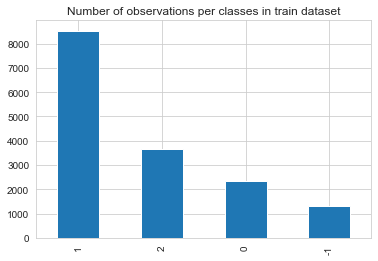

In [6]:
train.sentiment.value_counts().plot(kind='bar')
plt.title('Number of observations per classes in train dataset')
plt.show()

In [7]:
train["sentiment"].value_counts()

 1    8530
 2    3640
 0    2353
-1    1296
Name: sentiment, dtype: int64

In [8]:
#import the counV
from sklearn.feature_extraction.text import CountVectorizer
vect20 = CountVectorizer()

In [9]:
vect_20 = CountVectorizer(lowercase=True, stop_words='english',min_df=1,max_features=20,analyzer='word', ngram_range=(1, 3))
X_count = vect_20.fit_transform(train['message'].values.astype(str))

In [10]:
X_count.shape

(15819, 20)

In [11]:
vect_20.get_feature_names()

['amp',
 'believe',
 'believe climate',
 'believe climate change',
 'change',
 'change https',
 'climate',
 'climate change',
 'climate change https',
 'doesn',
 'global',
 'global warming',
 'going',
 'https',
 'people',
 'real',
 'rt',
 'trump',
 'warming',
 'world']

In [12]:
X_count.toarray()

array([[0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 1, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [13]:
pd.DataFrame(X_count.toarray(),columns=vect_20.get_feature_names())

,amp,believe,believe climate,believe climate change,change,change https,climate,climate change,climate change https,doesn,global,global warming,going,https,people,real,rt,trump,warming,world
0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0
2,0,0,0,0,1,0,1,1,0,0,0,0,0,2,0,0,1,0,0,0
3,0,0,0,0,1,1,1,1,1,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15814,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,0,1,0
15815,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0
15816,0,1,1,1,1,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0
15817,0,0,0,0,1,0,2,1,0,0,0,0,0,0,0,0,1,0,0,0


In [14]:
X = X_count.toarray()

2. Response Variable
Since our response consists of text categories, we need to somehow also convert to numerical values. Luckily for us, Sklearn has just the thing. Introducing the Label Encoder. Unlike pd.get_dummies method which creates a new column for every category it encounters, the LabelEncoder replaces each category with a number, the first category encountered will be replaced with a 0, the next one with a 1, the next with a 2, and so on.

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# Fit label encoder and return encoded labels
y = le.fit_transform(train['sentiment'])

In [16]:
y

array([2, 2, 3, ..., 1, 0, 1], dtype=int64)

And just like that, we have transformed our labels into a range of values between 0 and 15

In [17]:
# List of label encoder types to use for lookup 
type_labels = list(le.classes_)

Training the logistic regression model on standard MBTI data
Finally, our data are cleaned and processed, and we are now in a position to train a logistic regression model.

 ##Setting up the train_test_split##

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)

And then train a logistic regression model for each of these. At test time, we run the same test data through all the models and take the prediction of the logistic regression model with the highest probability.

In [20]:
# Here 'ovr' indicates that we have selected our One-vs-Rest strategy. 
logreg = LogisticRegression(multi_class='ovr',C=2)

In [21]:
logreg.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=2, multi_class='ovr')

Checking outcomes on the testing set
We now investigate the performance of our newly trained models on the Test set of our data.

In [22]:
# Generate predictions
y_pred_test = logreg.predict(X_test)

In [23]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

import warnings
warnings.filterwarnings('ignore')

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       246
           1       0.38      0.20      0.26       455
           2       0.62      0.87      0.72      1730
           3       0.62      0.43      0.51       733

    accuracy                           0.60      3164
   macro avg       0.40      0.37      0.37      3164
weighted avg       0.54      0.60      0.55      3164

